### **Import the dataset from Kaggle named 'How Education Drives Economic Growth' and view the dataset**

In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "education-economy-data.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "omarmohammed70/how-education-drives-economic-growth",
  file_path
)

print("First 5 records:")
df.head()

/var/folders/ht/r884vhyj7ng857zd0mxhfk640000gn/T/ipykernel_6120/1077772326.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:


,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
0,Afghanistan,43.0,0.28,1.723305e+10,2.710887,415.707417,Very Low,13.991,Asia
1,Albania,98.1,1.20,2.354718e+10,3.936625,8575.171134,Mid,10.108,Europe
2,Algeria,81.4,1.72,2.476260e+11,4.100000,5364.027950,Low,11.701,Africa
3,Andorra,100.0,3.33,3.785067e+09,2.583555,46812.448450,High,3.700,Europe
4,Angola,71.1,0.21,8.482465e+10,1.001289,2308.159767,Low,14.537,Africa


### **Plot a scatter-plot graph differntiating each countries for Literacy Rate VS GPD Growth (% Annual)**

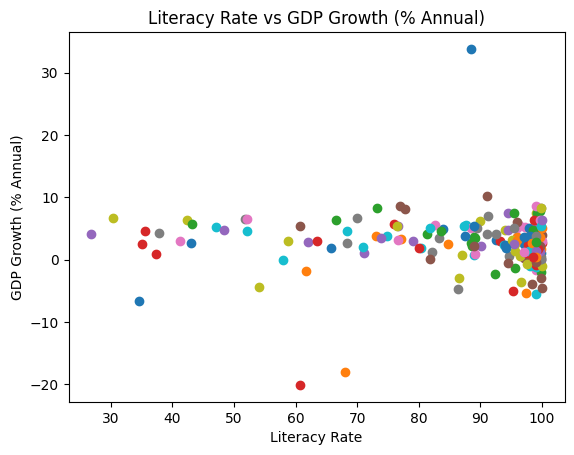

In [14]:
import matplotlib.pyplot as plt

for c in df["Country"].unique():
    plt.scatter(df[df["Country"] == c]["Literacy Rate"], df[df["Country"] == c]["GDP Growth (% Annual)"], label=c)
    
plt.xlabel('Literacy Rate')
plt.ylabel('GDP Growth (% Annual)')
plt.title('Literacy Rate vs GDP Growth (% Annual)')
plt.show()

### **Form two line graphs, one showing the Literacy Rate and other showing GDP Growth (% Annual)**

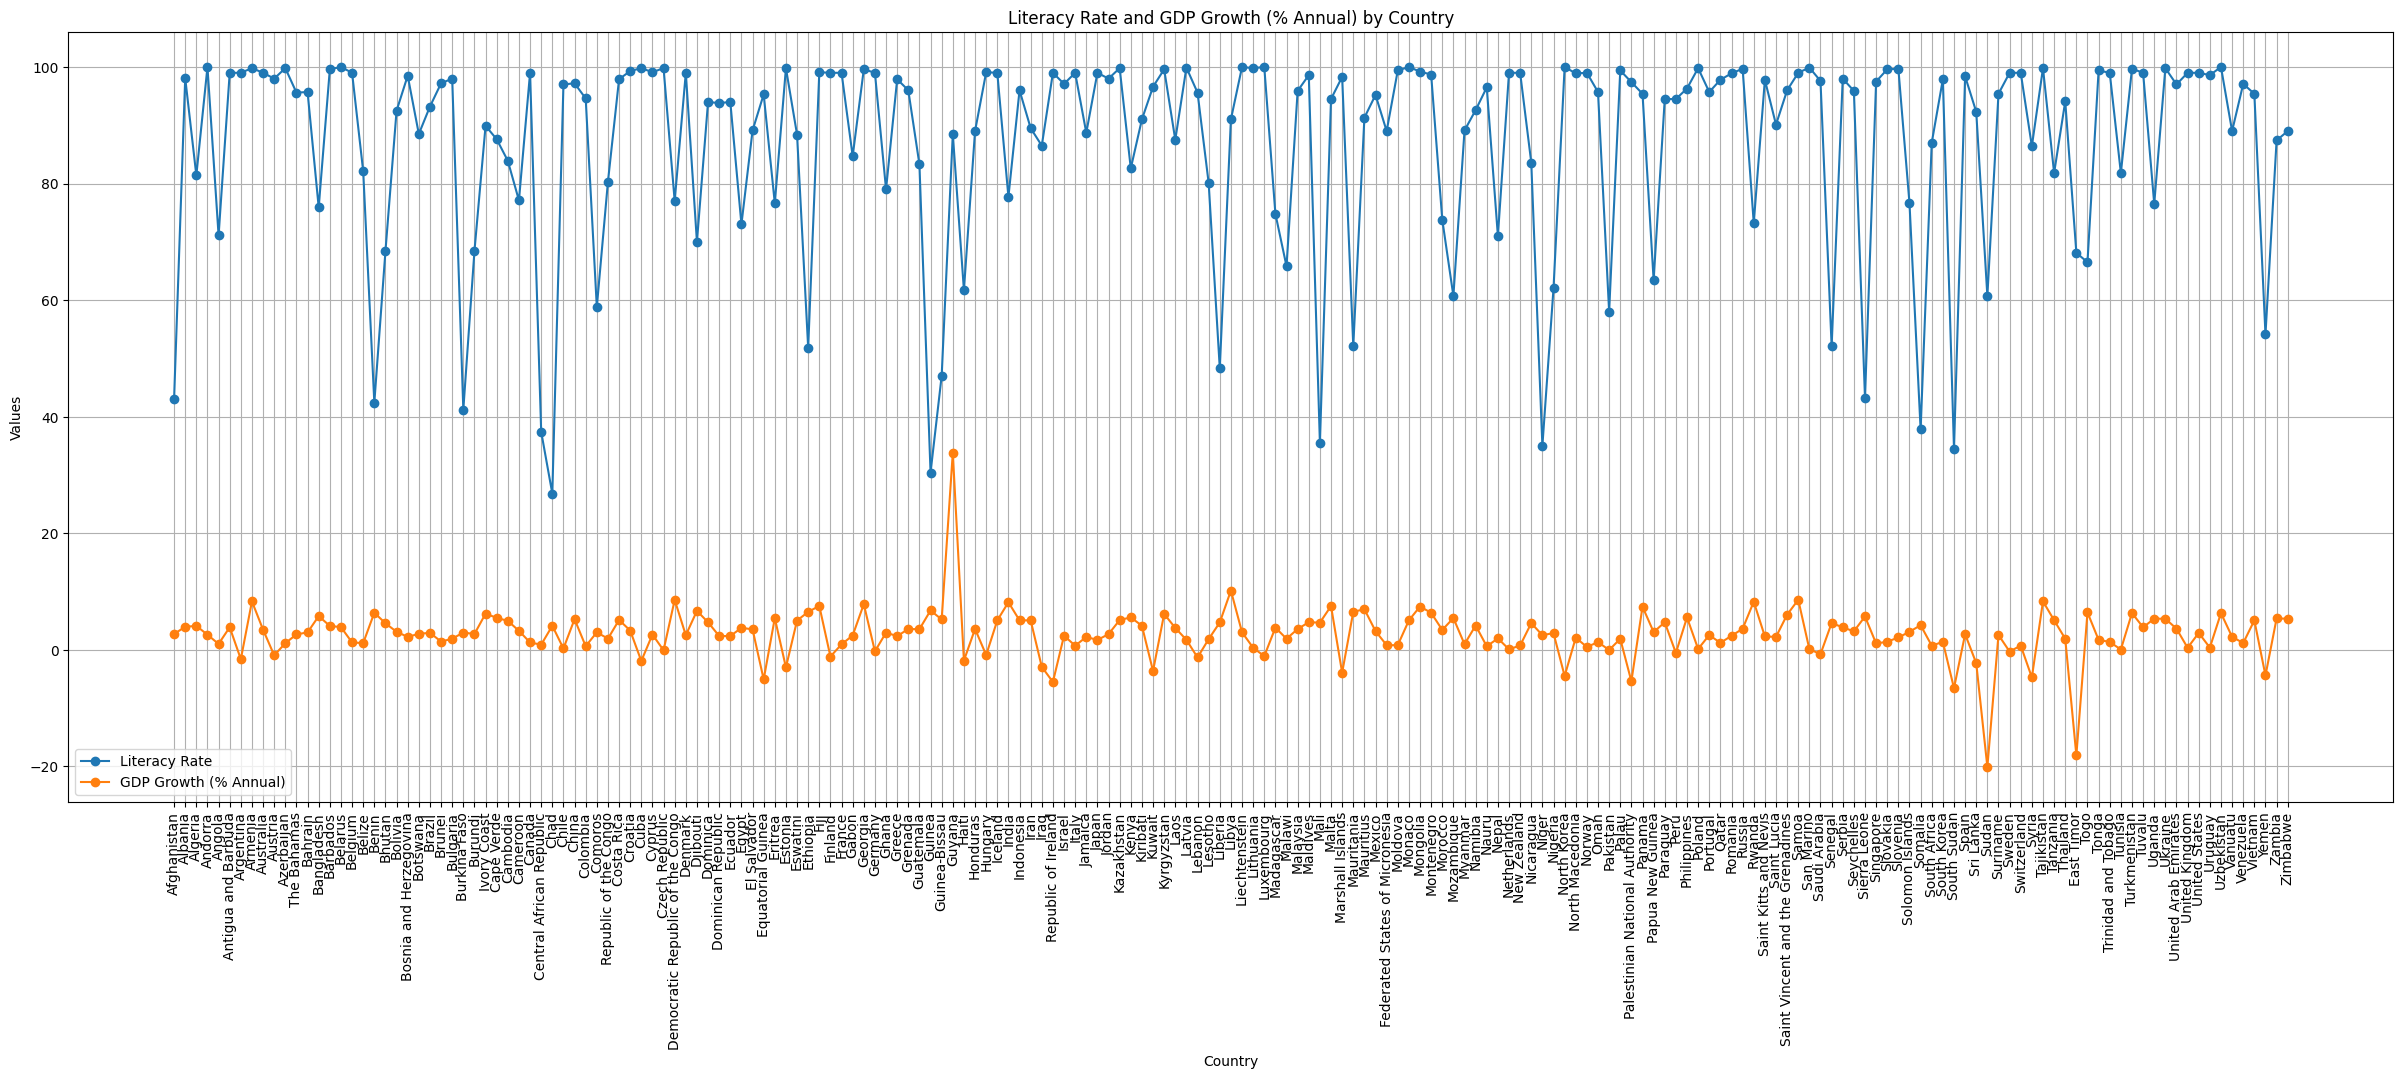

In [30]:
plot_df = df[["Country", "GDP Growth (% Annual)", "Literacy Rate"]].dropna()
plot_df = plot_df.sort_values('Country')
plt.figure(figsize=(30, 10))
plt.plot(df['Country'], df['Literacy Rate'], marker='o', label='Literacy Rate', color = 'tab:blue')
plt.plot(df['Country'], df['GDP Growth (% Annual)'], marker='o', label='GDP Growth (% Annual)', color = 'tab:orange')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Literacy Rate and GDP Growth (% Annual) by Country')
plt.legend()
plt.grid()
plt.show()

### **Simple Linear Regression**

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
file_path = "education-economy-data.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "omarmohammed70/how-education-drives-economic-growth",
  file_path
)

# Prepare variables and drop missing values
subset = df[['Literacy Rate', 'Unemployment Rate (%)', 'GDP Growth (% Annual)']].dropna()

# Define independent variables (add constant for intercept)
X = subset[['Literacy Rate', 'Unemployment Rate (%)']]
X = sm.add_constant(X)

# Define dependent variable
y = subset['GDP Growth (% Annual)']

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

# Print detailed summary
print(model.summary())

# You may also save the dataset with predictions
subset['Predicted GDP Growth'] = model.predict(X)

# Save the results to a new CSV file
# subset.to_csv('multiple_regression_results.csv', index=False)

/var/folders/ht/r884vhyj7ng857zd0mxhfk640000gn/T/ipykernel_6120/3082166710.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


                              OLS Regression Results                             
Dep. Variable:     GDP Growth (% Annual)   R-squared:                       0.009
Model:                               OLS   Adj. R-squared:                 -0.002
Method:                    Least Squares   F-statistic:                    0.8150
Date:                   Tue, 14 Oct 2025   Prob (F-statistic):              0.444
Time:                           21:16:35   Log-Likelihood:                -551.05
No. Observations:                    191   AIC:                             1108.
Df Residuals:                        188   BIC:                             1118.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### **Segmented Regression**

In [7]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
file_path = "education-economy-data.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "omarmohammed70/how-education-drives-economic-growth",
  file_path
)

# Clean relevant columns and drop missing data
df_clean = df[['Country', 'Literacy Rate', 'GDP Growth (% Annual)', 'GDP per Capita Category']].dropna()

# Sample 3 countries per GDP per Capita category
sampled = df_clean.groupby('GDP per Capita Category').head(30)

# Function to perform regression for each group
def run_segmented_regression(data, segment_col):
    groups = data[segment_col].unique()
    for group in groups:
        subset = data[data[segment_col] == group]
        X = sm.add_constant(subset['Literacy Rate'])
        y = subset['GDP Growth (% Annual)']
        model = sm.OLS(y, X).fit()
        print(f"Segment: {group}")
        print(subset[['Country', 'Literacy Rate', 'GDP Growth (% Annual)']])
        print(model.summary())
        print("\n" + "="*60 + "\n")

# Run segmented regression
run_segmented_regression(sampled, 'GDP per Capita Category')

/var/folders/ht/r884vhyj7ng857zd0mxhfk640000gn/T/ipykernel_6120/3433954193.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Segment: Very Low
                              Country  Literacy Rate  GDP Growth (% Annual)
0                         Afghanistan           43.0               2.710887
18                              Benin           42.4               6.352822
26                       Burkina Faso           41.2               2.960181
27                            Burundi           68.4               2.700001
31                           Cameroon           77.1               3.248345
33           Central African Republic           37.4               0.870251
34                               Chad           26.8               4.122320
38                            Comoros           58.8               2.995675
45   Democratic Republic of the Congo           77.0               8.560863
54                            Eritrea           76.6               5.436995
57                           Ethiopia           51.8               6.498135
68                             Guinea           30.4               6.7